In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# 打开csv文件
data = open('超市销售数据集.csv')
# pandas读取csv文件
data_pd = pd.read_csv('超市销售数据集.csv')

print(data_pd)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [3]:
# 清洗数据，删除空行空列
def data_clean():
    data_pd.dropna(axis = 0, how = 'all')
    data_pd.dropna(axis = 1, how = 'all')

场景1：ABC三个分支机构的销售总额

  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


C:\Users\17337\AppData\Local\Temp\ipykernel_27564\1860674191.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x = 'Branch',


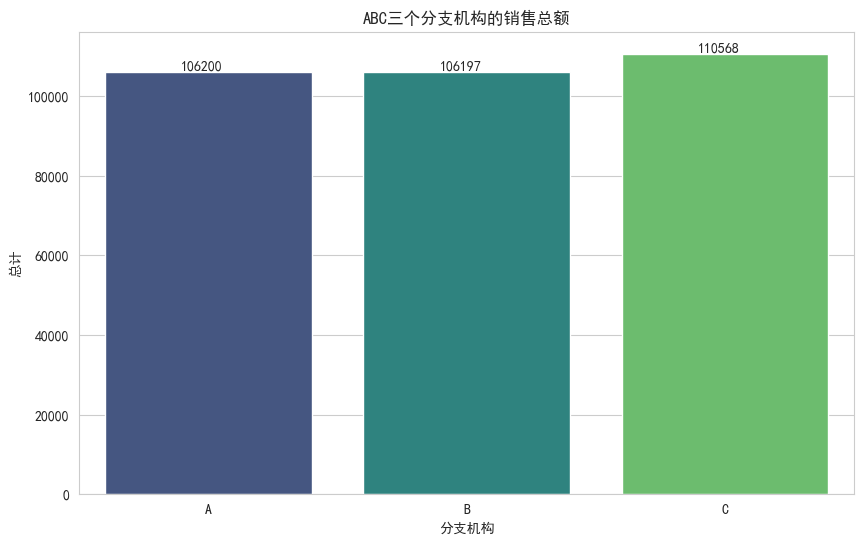

In [4]:
def branch_total():
    data_clean()

    # 转化为numpy数组
    data_np = np.array(data_pd)

    # 取出需要的列组成新的数组
    new_np = data_np[:, [1, 9]]

    # 定义函数，计算total的sum
    def count(X):
        sum = 0
        for i in range(len(new_np)):
            if new_np[i, 0] in X:
                sum += new_np[i, 1]
        return sum
    
    # 创建新的数组
    branch_total_np = [['A', count('A')], 
                       ['B', count('B')], 
                       ['C', count('C')]]
    header = ['Branch', 'Total']

    # 转换为DataFrame
    branch_total_pd = pd.DataFrame(branch_total_np, 
                                   columns = header)
    print(branch_total_pd)

    # 条形图实现
    sns.set_style('whitegrid')
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize = (10, 6))
    bar_plot = sns.barplot(x = 'Branch', 
                           y = 'Total', 
                           data = branch_total_pd, 
                           palette = 'viridis')
    plt.title('ABC三个分支机构的销售总额')
    plt.xlabel('分支机构')
    plt.ylabel('总计')
    # 将数字显示在图表上
    for p in bar_plot.patches:
        bar_plot.annotate(int(p.get_height()), 
                          (p.get_x() + 0.375, 
                           p.get_height() + 1), 
                           ha = 'center', 
                           va = 'bottom')
    plt.show()

branch_total()

场景2：ABC三个分支机构在不同月份的销售趋势

   月份           A           B           C
0   1  38681.1285  37176.0585  40434.6810
1   2  29860.1205  34424.2710  32934.9825
2   3  37659.1215  34597.3425  37199.0430


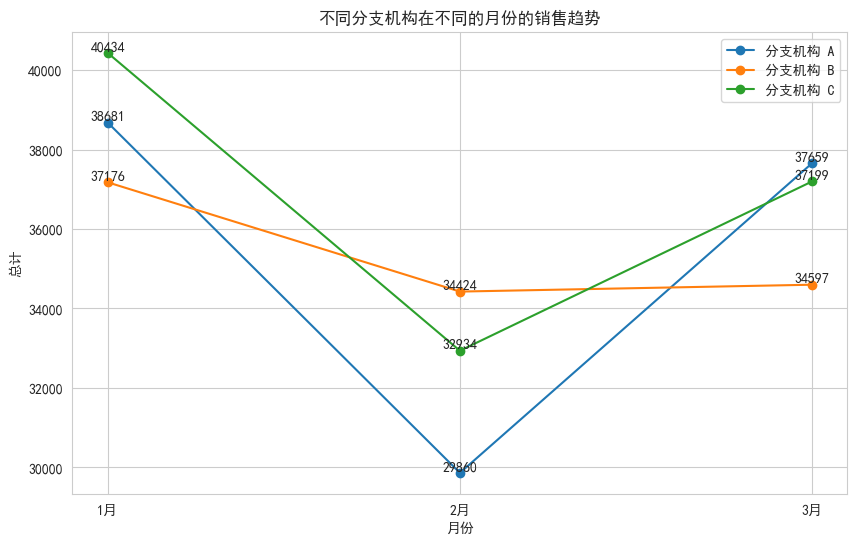

In [5]:
def branch_date_total():
    data_clean()

    # 转化为numpy数组
    data_np = np.array(data_pd)

    # 取出需要的列组成新的数组
    new_np = data_np[:, [1, 9, 10]]

    # 定义一个函数，分别计算ABC三个分支机构在三个月份的销售额
    # count(分支机构,月份)
    def count(X, y):
        # 定义一个数组，分别容纳三个分支机构的数据(total, date)，将相应的数据筛选出来
        array1 = []
        for i in range(len(new_np)):
            if new_np[i, 0] in X:
                array1.append([new_np[i, 1], new_np[i, 2]])

        # 再定义一个数组，分别容纳三个月的数据(total, date)
        # 将相应的数据筛选出来
        array2 = []
        for i, j in array1:
            array1 = datetime.strptime(j, '%m/%d/%Y')
            if array1.month == y:
                array2.append([i, j])

        # 将array2的数据total求和
        sum = 0
        for i, j in array2:
            sum += i   
        return sum

    # 创建新的字典
    branch_date_total_np = {'A': {1: count('A', 1), 
                                  2: count('A', 2), 
                                  3: count('A', 3)}, 
                            'B': {1: count('B', 1), 
                                  2: count('B', 2), 
                                  3: count('B', 3)}, 
                            'C': {1: count('C', 1), 
                                  2: count('C', 2), 
                                  3: count('C', 3)}}

    # 数据转换为DataFrame
    branch_date_total_dp = pd.DataFrame(branch_date_total_np)
    
    branch_date_total_dp = branch_date_total_dp.reset_index().rename(columns = {'index': '月份'})
    print(branch_date_total_dp)

    # 折线图实现
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize = (10, 6))
    for branch in branch_date_total_dp.columns[1:]:
        plt.plot(branch_date_total_dp['月份'], 
                 branch_date_total_dp[branch], 
                 marker = 'o', 
                 label = f'分支机构 {branch}')
        # 将数据显示在图表上
        for i, txt in enumerate(branch_date_total_dp[branch]):
            plt.text(branch_date_total_dp['月份'][i], 
                     txt, 
                     f'{int(txt)}', 
                     ha = 'center', 
                     va = 'bottom')
    plt.title('不同分支机构在不同的月份的销售趋势')
    plt.xlabel('月份')
    plt.ylabel('总计')
    plt.xticks([1, 2, 3], ['1月', '2月', '3月'])
    plt.grid(True)
    plt.legend()
    plt.show()

branch_date_total()

场景3：不同城市的客户评分分布

Rating     4.0   4.1   4.2   4.3   4.4   4.5   4.6   4.7   4.8   4.9   ...  \
City                                                                   ...   
Mandalay      5     6     7     7     5     7     4     5     5     8  ...   
Naypyitaw     4     6     4     5     6     4     1     2     4     6  ...   
Yangon        2     5    11     6     6     6     3     5     4     4  ...   

Rating     9.1   9.2   9.3   9.4   9.5   9.6   9.7   9.8   9.9   10.0  
City                                                                   
Mandalay      1     2     3     3     7     6     3     5     5     3  
Naypyitaw     5     6     7     6    10     5     5     6     4     1  
Yangon        8     8     6     3     5     6     6     8     7     1  

[3 rows x 61 columns]


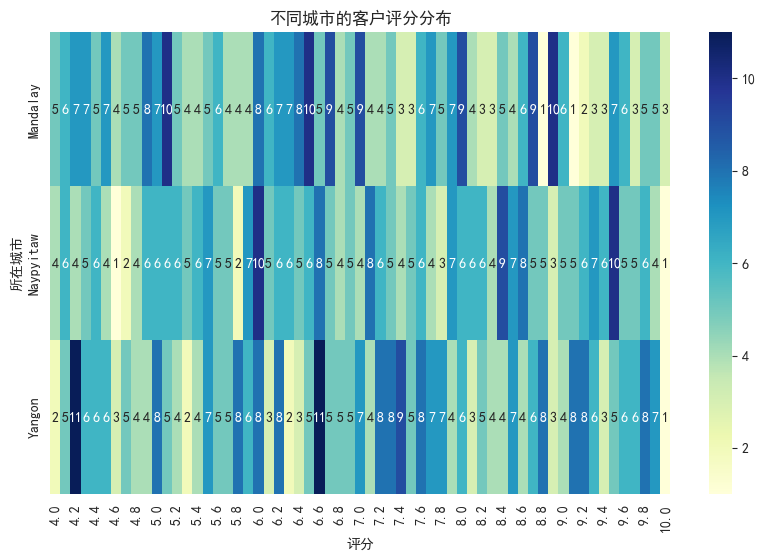

In [6]:
def city_rating():
    data_clean()

    # 创建透视表，按城市和评分进行计数
    pivoit_table = pd.pivot_table(data_pd, 
                                  values = 'Invoice ID', 
                                  index = 'City', 
                                  columns = 'Rating', 
                                  aggfunc = 'count', 
                                  fill_value = 0)
    print(pivoit_table)

    # 热力图实现
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize = (10, 6))
    sns.heatmap(pivoit_table, 
                annot = True, 
                fmt = 'd', 
                cmap = 'YlGnBu')
    plt.title('不同城市的客户评分分布')
    plt.xlabel('评分')
    plt.ylabel('所在城市')
    plt.show()

city_rating()

场景4：不同产品线的销售额占比

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


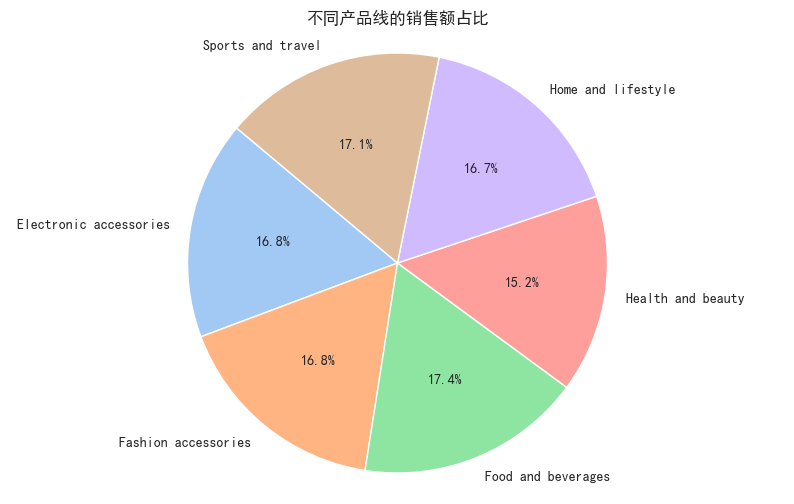

In [7]:
def productline_total():
    data_clean()

    # 计算不同产品线的销售总额
    productline_total_pd = data_pd.groupby('Product line')['Total'].sum()
    print(productline_total_pd)

    # 饼图实现
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize = (10, 6))
    plt.pie(productline_total_pd, 
            labels = productline_total_pd.index, 
            autopct = '%1.1f%%', 
            startangle = 140, 
            colors = sns.color_palette("pastel"))
    plt.title('不同产品线的销售额占比')
    plt.axis('equal')
    plt.show()

productline_total()

场景5：超市销售额在不同时间段的分布

0      13.133333
1      10.483333
2      13.383333
3      20.550000
4      10.616667
         ...    
995    13.766667
996    17.266667
997    13.366667
998    15.550000
999    13.466667
Name: Time_float, Length: 1000, dtype: float64


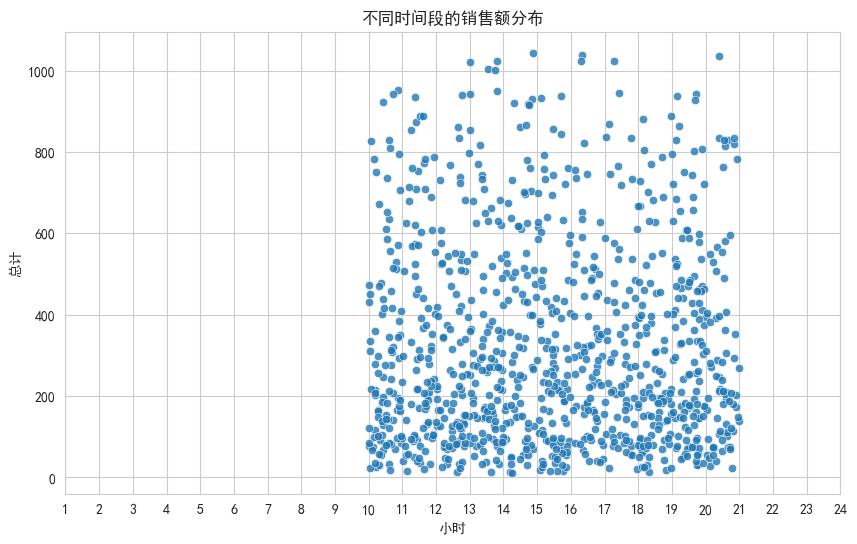

In [8]:
def time_total():
    data_clean()

    # 确保时间一列是x:x类型
    data_pd['Time'] = pd.to_datetime(data_pd['Time'], format = '%H:%M').dt.time

    # 提取小时和分钟的数据
    data_pd['Hour'] = data_pd['Time'].apply(lambda x:x.hour)
    data_pd['Minute'] = data_pd['Time'].apply(lambda x:x.minute)

    # 创建一个新列，将原来的x:x的格式转换成浮点数
    data_pd['Time_float'] = data_pd['Hour'] + data_pd['Minute'] / 60.0

    print(data_pd['Time_float'])

    # 散点图实现
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize = (10, 6))
    sns.scatterplot(x = 'Time_float', 
                    y = 'Total', 
                    data = data_pd, 
                    alpha = 0.8)
    plt.title('不同时间段的销售额分布')
    plt.xlabel('小时')
    plt.ylabel('总计')
    plt.xticks(range(1, 25))
    plt.grid(True)
    plt.show()

time_total()

场景6：不同客户类型在各个城市的分布情况

City           Mandalay  Naypyitaw  Yangon
Customer type                             
Member              165        169     167
Normal              167        159     173


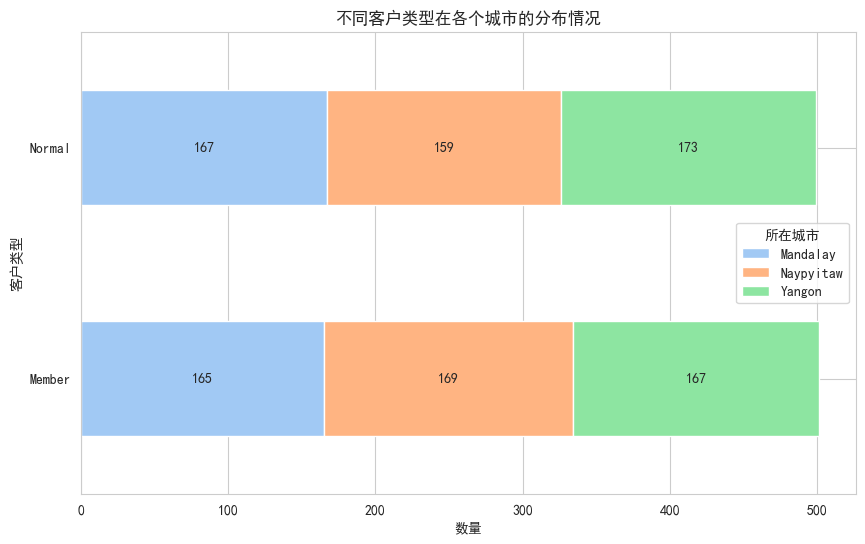

In [9]:
def customertype_branch_city():
    data_clean()

    # 创建透视表，按客户类型和所在城市进行计数
    pivot_table = pd.pivot_table(data_pd, 
                                 values = 'Invoice ID', 
                                 index = 'Customer type', 
                                 columns = 'City',
                                 aggfunc = 'count', 
                                 fill_value = 0)
    print(pivot_table)

    # 堆叠柱状图实现
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    ax = pivot_table.plot(kind = 'barh', 
                          figsize = (10, 6), 
                          stacked = True, 
                          color = sns.color_palette("pastel"))
    plt.title('不同客户类型在各个城市的分布情况')
    plt.xlabel('数量')
    plt.ylabel('客户类型')
    plt.legend(title = '所在城市')
    # 将数字显示在图表上
    for container in ax.containers:
        ax.bar_label(container, 
                     label_type = 'center')
    plt.show()

customertype_branch_city()

场景7：不同性别的客户在消费上的差异

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


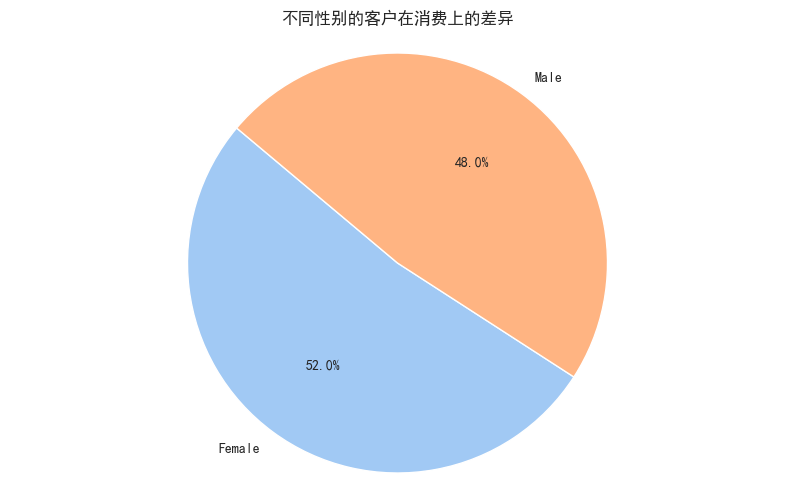

In [10]:
def gender_total():
    data_clean()

    # 计算不同性别贡献的销售额
    gender_pd = data_pd.groupby('Gender')['Total'].sum()
    print(gender_pd)

    # 饼图实现
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize = (10, 6))
    plt.pie(gender_pd, 
            labels = gender_pd.index, 
            autopct = '%1.1f%%', 
            startangle = 140, 
            colors = sns.color_palette("pastel"))
    plt.title('不同性别的客户在消费上的差异')
    plt.axis('equal')
    plt.show()

gender_total()

场景8：不同付款方式的使用频率

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


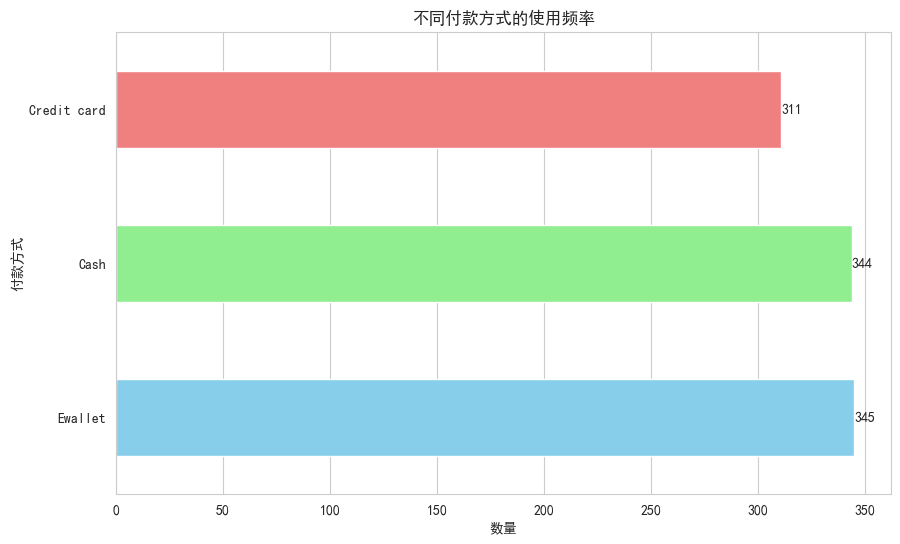

In [11]:
def payment():
    data_clean()

    #  统计每种付款方式的数量
    payment_pd = data_pd['Payment'].value_counts()
    print(payment_pd)

    # 条形图实现
    # 可以输出中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.figure(figsize = (10, 6))
    bar_plot = payment_pd.plot(kind = 'barh', 
                               color = ['skyblue', 'lightgreen', 'lightcoral'])
    plt.title('不同付款方式的使用频率')
    plt.xlabel('数量')
    plt.ylabel('付款方式')
    plt.grid(axis = 'y')
    # 将数字显示在图表上
    for p in bar_plot.patches:
        bar_plot.annotate(p.get_width(), 
                          (p.get_width(), 
                           p.get_y() + 0.25), 
                           ha = 'left', 
                           va = 'center')
    plt.show()

payment()